In [1]:
#Import Library that will be used
import pandas as pd
import joblib
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.model_selection import cross_val_score

In [2]:
#Input the dataset
X_train = pd.read_csv('dataset-after-preparation\X_train.csv')
X_test = pd.read_csv('dataset-after-preparation\X_test.csv')
y_train = pd.read_csv('dataset-after-preparation\y_train.csv')
y_test = pd.read_csv('dataset-after-preparation\y_test.csv')
X_valid = pd.read_csv('dataset-after-preparation\X_valid.csv')
y_valid = pd.read_csv('dataset-after-preparation\y_valid.csv')


#input the selected feature by using variance threshold
VT_selected_feature_Zoo = joblib.load('VT_selected_feature_Zoo.pkl')
pso_linear_first = joblib.load('PSO-selected-feature/pso-linear-first.pkl')
pso_rbf_first = joblib.load('PSO-selected-feature/pso-rbf-first.pkl')
pso_poly_first = joblib.load('PSO-selected-feature/pso-poly-first.pkl')

pso_linear_second = joblib.load('PSO-selected-feature/pso-linear-second.pkl')
pso_rbf_second = joblib.load('PSO-selected-feature/pso-rbf-second.pkl')
pso_poly_second = joblib.load('PSO-selected-feature/pso-poly-second.pkl')

In [3]:
#put the selected feature on the dataset
X_train_VT = X_train[VT_selected_feature_Zoo]
X_train_linear_first = X_train[pso_linear_first]
X_train_rbf_first = X_train[pso_rbf_first]
X_train_poly_first = X_train[pso_poly_first]

X_train_linear_second = X_train[pso_linear_second]
X_train_rbf_second = X_train[pso_rbf_second]
X_train_poly_second = X_train[pso_poly_second]

In [4]:
X_train_VT

,209720_s_at,217653_x_at,215604_x_at,214594_x_at,207953_at,216609_at,205292_s_at,208864_s_at,217679_x_at,206056_x_at,...,221728_x_at,208719_s_at,214370_at,206529_x_at,206025_s_at,212657_s_at,202499_s_at,209351_at,211719_x_at,214218_s_at
0,3.070971,2.143948,2.448449,2.318584,2.276682,2.184782,3.040806,3.340347,2.509717,2.055980,...,2.379151,2.389606,1.876823,1.674760,2.310929,2.840391,1.990811,2.005734,2.977765,1.707757
1,3.256913,2.192104,2.598688,2.519168,2.397743,1.994434,3.134083,3.217164,2.635188,2.043305,...,2.324294,2.203478,1.863487,1.859301,2.066188,2.846777,1.742856,2.515425,2.623609,1.725235
2,3.151953,2.557625,2.899922,2.949728,2.739890,2.126646,2.655731,2.921777,3.010178,2.547760,...,2.496956,2.203444,2.178651,1.862315,2.200731,2.754910,1.970567,2.392195,2.568849,1.689167
3,3.135153,2.131548,2.470550,2.156956,2.329255,2.064197,3.040357,3.200554,2.482408,2.013541,...,2.975522,2.723166,1.765023,1.684457,1.972539,2.621454,1.636193,2.371066,2.419884,2.614415
4,2.839373,2.301768,2.804243,2.784016,2.552104,1.903286,2.411785,2.977480,2.949615,2.443250,...,2.506481,2.148033,1.906013,2.020068,2.372995,2.843741,2.029599,2.320348,2.750661,1.924025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,3.023559,2.284004,2.825340,2.754746,2.613344,1.764710,2.379167,2.902023,2.728322,2.466654,...,2.287103,2.459610,1.860208,1.638666,2.058465,2.663446,1.731018,2.416373,2.166555,1.513259
126,3.299427,2.360078,2.687610,2.799913,2.506660,2.515608,3.135428,3.342398,2.856345,2.265811,...,3.035673,2.289845,2.478638,2.311450,2.057571,2.853325,2.156795,2.135665,2.926642,2.459417
127,3.184152,2.370920,2.815919,2.750996,2.587275,2.412423,2.939161,3.357292,2.947863,2.422262,...,2.313259,2.371716,2.832474,1.887824,2.363249,3.185290,2.836760,2.268364,2.930293,1.689884
128,3.185631,2.597250,2.811467,2.788203,2.630920,2.166725,3.187932,3.364191,3.005933,2.245423,...,2.412690,2.364395,1.743820,1.629251,2.073299,2.659584,1.691010,2.642236,2.776883,1.776972


In [5]:
X_train_linear_first

,209720_s_at,214594_x_at,216609_at,208864_s_at,215208_x_at,215907_at,209860_s_at,215600_x_at,200853_at,220720_x_at,...,216841_s_at,220026_at,217767_at,204058_at,203980_at,210495_x_at,206276_at,208719_s_at,206025_s_at,211719_x_at
0,3.070971,2.318584,2.184782,3.340347,2.164784,2.308751,3.203413,2.622790,2.967874,2.816611,...,2.347324,2.111087,3.104534,2.223447,2.884567,3.038450,2.375566,2.389606,2.310929,2.977765
1,3.256913,2.519168,1.994434,3.217164,2.103818,2.452289,3.094224,2.729315,2.984012,2.768442,...,2.052201,2.457771,3.406460,1.916198,2.656215,2.648978,2.502782,2.203478,2.066188,2.623609
2,3.151953,2.949728,2.126646,2.921777,2.464359,2.878970,2.648497,3.060396,2.741705,3.172448,...,1.825962,2.215801,3.372300,1.710419,2.552427,2.698464,2.874297,2.203444,2.200731,2.568849
3,3.135153,2.156956,2.064197,3.200554,2.079336,2.413238,3.147632,2.598989,3.002404,2.723991,...,1.991711,2.323612,3.344381,1.767880,2.426463,2.543855,2.392568,2.723166,1.972539,2.419884
4,2.839373,2.784016,1.903286,2.977480,2.565927,2.715590,2.687686,3.024575,2.635500,3.021039,...,2.151303,2.213212,3.134896,1.845018,2.675052,2.698767,2.293020,2.148033,2.372995,2.750661
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,3.023559,2.754746,1.764710,2.902023,2.351849,2.555104,2.518010,2.944739,2.421516,2.984985,...,1.806960,2.062509,3.054480,1.723213,2.327027,2.176133,2.568829,2.459610,2.058465,2.166555
126,3.299427,2.799913,2.515608,3.342398,2.335839,2.561677,3.105218,2.853140,2.988326,3.011706,...,2.120012,2.327598,3.327464,1.998015,2.488295,2.913549,2.493076,2.289845,2.057571,2.926642
127,3.184152,2.750996,2.412423,3.357292,2.316409,2.668831,2.987704,2.947528,2.889560,3.052467,...,2.204551,2.161984,3.315738,1.894659,3.073461,2.939938,2.611951,2.371716,2.363249,2.930293
128,3.185631,2.788203,2.166725,3.364191,2.357660,2.664808,3.177911,3.007312,3.062880,3.037614,...,1.929679,2.213465,3.163844,2.001489,2.723479,2.859593,2.260344,2.364395,2.073299,2.776883


In [6]:
X_train_rbf_first

,209720_s_at,217653_x_at,216609_at,217679_x_at,215208_x_at,215907_at,215600_x_at,200627_at,206332_s_at,218729_at,...,205681_at,204446_s_at,205680_at,206276_at,210873_x_at,214370_at,206529_x_at,206025_s_at,212657_s_at,209351_at
0,3.070971,2.143948,2.184782,2.509717,2.164784,2.308751,2.622790,3.262281,2.729978,3.161006,...,2.516336,2.566473,2.059066,2.375566,1.839884,1.876823,1.674760,2.310929,2.840391,2.005734
1,3.256913,2.192104,1.994434,2.635188,2.103818,2.452289,2.729315,3.294999,2.805596,3.031486,...,2.118981,2.389717,2.628752,2.502782,1.812563,1.863487,1.859301,2.066188,2.846777,2.515425
2,3.151953,2.557625,2.126646,3.010178,2.464359,2.878970,3.060396,3.075221,2.399413,2.810641,...,1.937575,2.375439,2.237437,2.874297,1.826530,2.178651,1.862315,2.200731,2.754910,2.392195
3,3.135153,2.131548,2.064197,2.482408,2.079336,2.413238,2.598989,3.292716,2.767606,3.038565,...,1.823550,2.208655,2.982176,2.392568,1.730481,1.765023,1.684457,1.972539,2.621454,2.371066
4,2.839373,2.301768,1.903286,2.949615,2.565927,2.715590,3.024575,3.085149,2.511392,2.726219,...,2.248471,2.310720,2.384636,2.293020,2.050460,1.906013,2.020068,2.372995,2.843741,2.320348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,3.023559,2.284004,1.764710,2.728322,2.351849,2.555104,2.944739,2.861601,2.246767,2.448266,...,1.962402,2.068126,2.623996,2.568829,1.800025,1.860208,1.638666,2.058465,2.663446,2.416373
126,3.299427,2.360078,2.515608,2.856345,2.335839,2.561677,2.853140,3.214207,2.826638,3.009632,...,2.286434,2.421271,2.438956,2.493076,1.813275,2.478638,2.311450,2.057571,2.853325,2.135665
127,3.184152,2.370920,2.412423,2.947863,2.316409,2.668831,2.947528,3.261290,2.785921,2.928926,...,2.887205,2.788217,2.269176,2.611951,2.251288,2.832474,1.887824,2.363249,3.185290,2.268364
128,3.185631,2.597250,2.166725,3.005933,2.357660,2.664808,3.007312,3.369255,2.770413,3.060965,...,1.998136,2.493351,2.608662,2.260344,1.847822,1.743820,1.629251,2.073299,2.659584,2.642236


In [7]:
X_train_poly_first

,214594_x_at,207953_at,216609_at,208864_s_at,217679_x_at,217715_x_at,215907_at,208635_x_at,215600_x_at,208736_at,...,206306_at,205681_at,209921_at,203980_at,210445_at,217678_at,204438_at,206276_at,206529_x_at,202499_s_at
0,2.318584,2.276682,2.184782,3.340347,2.509717,2.127704,2.308751,3.383922,2.622790,2.962485,...,2.574015,2.516336,2.784533,2.884567,2.839129,2.603191,2.891323,2.375566,1.674760,1.990811
1,2.519168,2.397743,1.994434,3.217164,2.635188,2.129820,2.452289,3.413334,2.729315,3.037713,...,2.832097,2.118981,1.985114,2.656215,3.080837,2.068898,2.278549,2.502782,1.859301,1.742856
2,2.949728,2.739890,2.126646,2.921777,3.010178,2.603566,2.878970,3.072047,3.060396,2.760023,...,2.549350,1.937575,1.819444,2.552427,3.169070,2.017579,2.348192,2.874297,1.862315,1.970567
3,2.156956,2.329255,2.064197,3.200554,2.482408,2.035916,2.413238,3.490745,2.598989,2.888836,...,2.566636,1.823550,1.805323,2.426463,2.940296,1.926370,2.112787,2.392568,1.684457,1.636193
4,2.784016,2.552104,1.903286,2.977480,2.949615,2.388174,2.715590,3.178183,3.024575,2.598510,...,2.444691,2.248471,1.815249,2.675052,2.888473,2.093151,2.145536,2.293020,2.020068,2.029599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,2.754746,2.613344,1.764710,2.902023,2.728322,2.539680,2.555104,3.091178,2.944739,2.632998,...,2.167927,1.962402,1.881764,2.327027,2.859123,2.029836,1.980934,2.568829,1.638666,1.731018
126,2.799913,2.506660,2.515608,3.342398,2.856345,2.276846,2.561677,3.374319,2.853140,3.040034,...,2.322743,2.286434,2.573440,2.488295,2.599052,2.384489,2.600786,2.493076,2.311450,2.156795
127,2.750996,2.587275,2.412423,3.357292,2.947863,2.373526,2.668831,3.356049,2.947528,2.980321,...,2.183292,2.887205,2.297847,3.073461,2.770859,2.323402,2.878983,2.611951,1.887824,2.836760
128,2.788203,2.630920,2.166725,3.364191,3.005933,2.372416,2.664808,3.426723,3.007312,3.051888,...,1.815855,1.998136,2.004950,2.723479,3.129414,2.119676,2.672532,2.260344,1.629251,1.691010


In [8]:
X_train_linear_second

,209720_s_at,215604_x_at,207953_at,208864_s_at,217679_x_at,206056_x_at,209860_s_at,215600_x_at,200853_at,216858_x_at,...,210445_at,217678_at,204438_at,204446_s_at,205680_at,216442_x_at,208719_s_at,206025_s_at,212657_s_at,202499_s_at
0,3.070971,2.448449,2.276682,3.340347,2.509717,2.055980,3.203413,2.622790,2.967874,2.543185,...,2.839129,2.603191,2.891323,2.566473,2.059066,3.004754,2.389606,2.310929,2.840391,1.990811
1,3.256913,2.598688,2.397743,3.217164,2.635188,2.043305,3.094224,2.729315,2.984012,2.570337,...,3.080837,2.068898,2.278549,2.389717,2.628752,2.666887,2.203478,2.066188,2.846777,1.742856
2,3.151953,2.899922,2.739890,2.921777,3.010178,2.547760,2.648497,3.060396,2.741705,2.943418,...,3.169070,2.017579,2.348192,2.375439,2.237437,2.657317,2.203444,2.200731,2.754910,1.970567
3,3.135153,2.470550,2.329255,3.200554,2.482408,2.013541,3.147632,2.598989,3.002404,2.471666,...,2.940296,1.926370,2.112787,2.208655,2.982176,2.528641,2.723166,1.972539,2.621454,1.636193
4,2.839373,2.804243,2.552104,2.977480,2.949615,2.443250,2.687686,3.024575,2.635500,2.918390,...,2.888473,2.093151,2.145536,2.310720,2.384636,2.717106,2.148033,2.372995,2.843741,2.029599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,3.023559,2.825340,2.613344,2.902023,2.728322,2.466654,2.518010,2.944739,2.421516,2.791295,...,2.859123,2.029836,1.980934,2.068126,2.623996,2.319001,2.459610,2.058465,2.663446,1.731018
126,3.299427,2.687610,2.506660,3.342398,2.856345,2.265811,3.105218,2.853140,2.988326,2.691135,...,2.599052,2.384489,2.600786,2.421271,2.438956,2.856492,2.289845,2.057571,2.853325,2.156795
127,3.184152,2.815919,2.587275,3.357292,2.947863,2.422262,2.987704,2.947528,2.889560,2.843190,...,2.770859,2.323402,2.878983,2.788217,2.269176,2.882444,2.371716,2.363249,3.185290,2.836760
128,3.185631,2.811467,2.630920,3.364191,3.005933,2.245423,3.177911,3.007312,3.062880,2.820196,...,3.129414,2.119676,2.672532,2.493351,2.608662,2.817271,2.364395,2.073299,2.659584,1.691010


In [9]:
X_train_rbf_second

,209720_s_at,217653_x_at,215604_x_at,205292_s_at,217679_x_at,217715_x_at,215907_at,208635_x_at,215600_x_at,208736_at,...,210495_x_at,217678_at,204438_at,205680_at,206276_at,210873_x_at,214370_at,206529_x_at,202499_s_at,209351_at
0,3.070971,2.143948,2.448449,3.040806,2.509717,2.127704,2.308751,3.383922,2.622790,2.962485,...,3.038450,2.603191,2.891323,2.059066,2.375566,1.839884,1.876823,1.674760,1.990811,2.005734
1,3.256913,2.192104,2.598688,3.134083,2.635188,2.129820,2.452289,3.413334,2.729315,3.037713,...,2.648978,2.068898,2.278549,2.628752,2.502782,1.812563,1.863487,1.859301,1.742856,2.515425
2,3.151953,2.557625,2.899922,2.655731,3.010178,2.603566,2.878970,3.072047,3.060396,2.760023,...,2.698464,2.017579,2.348192,2.237437,2.874297,1.826530,2.178651,1.862315,1.970567,2.392195
3,3.135153,2.131548,2.470550,3.040357,2.482408,2.035916,2.413238,3.490745,2.598989,2.888836,...,2.543855,1.926370,2.112787,2.982176,2.392568,1.730481,1.765023,1.684457,1.636193,2.371066
4,2.839373,2.301768,2.804243,2.411785,2.949615,2.388174,2.715590,3.178183,3.024575,2.598510,...,2.698767,2.093151,2.145536,2.384636,2.293020,2.050460,1.906013,2.020068,2.029599,2.320348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,3.023559,2.284004,2.825340,2.379167,2.728322,2.539680,2.555104,3.091178,2.944739,2.632998,...,2.176133,2.029836,1.980934,2.623996,2.568829,1.800025,1.860208,1.638666,1.731018,2.416373
126,3.299427,2.360078,2.687610,3.135428,2.856345,2.276846,2.561677,3.374319,2.853140,3.040034,...,2.913549,2.384489,2.600786,2.438956,2.493076,1.813275,2.478638,2.311450,2.156795,2.135665
127,3.184152,2.370920,2.815919,2.939161,2.947863,2.373526,2.668831,3.356049,2.947528,2.980321,...,2.939938,2.323402,2.878983,2.269176,2.611951,2.251288,2.832474,1.887824,2.836760,2.268364
128,3.185631,2.597250,2.811467,3.187932,3.005933,2.372416,2.664808,3.426723,3.007312,3.051888,...,2.859593,2.119676,2.672532,2.608662,2.260344,1.847822,1.743820,1.629251,1.691010,2.642236


In [10]:
X_train_poly_second

,217653_x_at,215604_x_at,207953_at,205292_s_at,208864_s_at,206056_x_at,217715_x_at,215907_at,209860_s_at,215600_x_at,...,204438_at,204446_s_at,216442_x_at,206276_at,210873_x_at,221728_x_at,214370_at,202499_s_at,209351_at,211719_x_at
0,2.143948,2.448449,2.276682,3.040806,3.340347,2.055980,2.127704,2.308751,3.203413,2.622790,...,2.891323,2.566473,3.004754,2.375566,1.839884,2.379151,1.876823,1.990811,2.005734,2.977765
1,2.192104,2.598688,2.397743,3.134083,3.217164,2.043305,2.129820,2.452289,3.094224,2.729315,...,2.278549,2.389717,2.666887,2.502782,1.812563,2.324294,1.863487,1.742856,2.515425,2.623609
2,2.557625,2.899922,2.739890,2.655731,2.921777,2.547760,2.603566,2.878970,2.648497,3.060396,...,2.348192,2.375439,2.657317,2.874297,1.826530,2.496956,2.178651,1.970567,2.392195,2.568849
3,2.131548,2.470550,2.329255,3.040357,3.200554,2.013541,2.035916,2.413238,3.147632,2.598989,...,2.112787,2.208655,2.528641,2.392568,1.730481,2.975522,1.765023,1.636193,2.371066,2.419884
4,2.301768,2.804243,2.552104,2.411785,2.977480,2.443250,2.388174,2.715590,2.687686,3.024575,...,2.145536,2.310720,2.717106,2.293020,2.050460,2.506481,1.906013,2.029599,2.320348,2.750661
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,2.284004,2.825340,2.613344,2.379167,2.902023,2.466654,2.539680,2.555104,2.518010,2.944739,...,1.980934,2.068126,2.319001,2.568829,1.800025,2.287103,1.860208,1.731018,2.416373,2.166555
126,2.360078,2.687610,2.506660,3.135428,3.342398,2.265811,2.276846,2.561677,3.105218,2.853140,...,2.600786,2.421271,2.856492,2.493076,1.813275,3.035673,2.478638,2.156795,2.135665,2.926642
127,2.370920,2.815919,2.587275,2.939161,3.357292,2.422262,2.373526,2.668831,2.987704,2.947528,...,2.878983,2.788217,2.882444,2.611951,2.251288,2.313259,2.832474,2.836760,2.268364,2.930293
128,2.597250,2.811467,2.630920,3.187932,3.364191,2.245423,2.372416,2.664808,3.177911,3.007312,...,2.672532,2.493351,2.817271,2.260344,1.847822,2.412690,1.743820,1.691010,2.642236,2.776883


In [11]:
print("X_train_VT shape: ", X_train_VT.shape)
print("X_train_linear_first shape: ", X_train_linear_first.shape)
print("X_train_rbf_first shape: ", X_train_rbf_first.shape)
print("X_train_poly_first shape: ", X_train_poly_first.shape)
print("============================")
print("X_train_linear_second shape: ", X_train_linear_second.shape)
print("X_train_rbf_second shape: ", X_train_rbf_second.shape)
print("X_train_poly_second shape: ", X_train_poly_second.shape)

X_train_VT shape:  (130, 1090)
X_train_linear_first shape:  (130, 524)
X_train_rbf_first shape:  (130, 519)
X_train_poly_first shape:  (130, 519)
X_train_linear_second shape:  (130, 528)
X_train_rbf_second shape:  (130, 520)
X_train_poly_second shape:  (130, 588)


## Before Tuning with Hyperparameter

##### Default Parameter on Linear Kernel

In [12]:
### create model
clf_linear = SVC(kernel='linear')
### cross-validation evaluation
cv_linear_first = cross_val_score(clf_linear, X_train_linear_first, y_train.values.ravel(), scoring='accuracy', cv=5)
### Show CV result
print("%0.2f [LINEAR] accuracy with a standard deviation of %0.2f" % (cv_linear_first.mean(), cv_linear_first.std()))

0.67 [LINEAR] accuracy with a standard deviation of 0.09


In [13]:
### create model
clf_linear = SVC(kernel='linear')
### cross-validation evaluation
cv_linear_second = cross_val_score(clf_linear, X_train_linear_second, y_train.values.ravel(), scoring='accuracy', cv=5)
### Show CV result
print("%0.2f [LINEAR] accuracy with a standard deviation of %0.2f" % (cv_linear_second.mean(), cv_linear_second.std()))

0.72 [LINEAR] accuracy with a standard deviation of 0.08


##### Default Parameter on RBF Kernel

In [14]:
### create model
clf_rbf = SVC(kernel='rbf')
### cross-validation evaluation
cv_rbf_first = cross_val_score(clf_rbf, X_train_rbf_first, y_train.values.ravel(), scoring='accuracy', cv=5)
### Show CV result
print("%0.2f [RBF] accuracy with a standard deviation of %0.2f" % (cv_rbf_first.mean(), cv_rbf_first.std()))

0.68 [RBF] accuracy with a standard deviation of 0.08


In [15]:
### create model
clf_rbf = SVC(kernel='rbf')
### cross-validation evaluation
cv_rbf_second = cross_val_score(clf_rbf, X_train_rbf_second, y_train.values.ravel(), scoring='accuracy', cv=5)
### Show CV result
print("%0.2f [RBF] accuracy with a standard deviation of %0.2f" % (cv_rbf_second.mean(), cv_rbf_second.std()))

0.68 [RBF] accuracy with a standard deviation of 0.10


##### Default Parameter on Poly Kernel

In [16]:
### create model
clf_poly = SVC(kernel='poly')
### cross-validation evaluation
cv_poly_first = cross_val_score(clf_poly, X_train_poly_first, y_train.values.ravel(), scoring='accuracy', cv=5)
### Show CV result
print("%0.2f [POLY] accuracy with a standard deviation of %0.2f" % (cv_poly_first.mean(), cv_poly_first.std()))

0.67 [POLY] accuracy with a standard deviation of 0.08


In [17]:
### create model
clf_poly = SVC(kernel='poly')
### cross-validation evaluation
cv_poly_second = cross_val_score(clf_poly, X_train_poly_second, y_train.values.ravel(), scoring='accuracy', cv=5)
### Show CV result
print("%0.2f [POLY] accuracy with a standard deviation of %0.2f" % (cv_poly_second.mean(), cv_poly_second.std()))

0.69 [POLY] accuracy with a standard deviation of 0.08


## Tuning Parameter with GridSearchCV

##### Linear Kernel

In [18]:
param_grid = {'C': [0.001, 0.1, 1, 10, 100, 1000],
              'kernel': ['linear']
             }
 
grid = GridSearchCV(svm.SVC(), param_grid, scoring='accuracy', refit = True, verbose = 3) 
# fitting the model for grid search
grid.fit(X_train_linear_first, y_train.values.ravel())

#saving the grid on each params into the pkl 
joblib.dump(grid, "params_pkl/grid_linear.pkl")

selected_kernel_linear_first = grid.best_params_['kernel']
selected_C_linear_first = grid.best_params_['C']
best_params_linear_ht_first = grid.best_params_
model_looks_linear_HT_first = grid.best_estimator_

joblib.dump(best_params_linear_ht_first, "params_pkl/best_params_linear_ht_first.pkl")
joblib.dump(model_looks_linear_HT_first, "params_pkl/model_looks_linear_HT_first.pkl")

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END ............C=0.001, kernel=linear;, score=0.538 total time=   0.0s
[CV 2/5] END ............C=0.001, kernel=linear;, score=0.538 total time=   0.0s
[CV 3/5] END ............C=0.001, kernel=linear;, score=0.538 total time=   0.0s
[CV 4/5] END ............C=0.001, kernel=linear;, score=0.500 total time=   0.0s
[CV 5/5] END ............C=0.001, kernel=linear;, score=0.500 total time=   0.0s
[CV 1/5] END ..............C=0.1, kernel=linear;, score=0.538 total time=   0.0s
[CV 2/5] END ..............C=0.1, kernel=linear;, score=0.808 total time=   0.0s
[CV 3/5] END ..............C=0.1, kernel=linear;, score=0.846 total time=   0.0s
[CV 4/5] END ..............C=0.1, kernel=linear;, score=0.692 total time=   0.0s
[CV 5/5] END ..............C=0.1, kernel=linear;, score=0.769 total time=   0.0s
[CV 1/5] END ................C=1, kernel=linear;, score=0.615 total time=   0.0s
[CV 2/5] END ................C=1, kernel=linear;,

['params_pkl/model_looks_linear_HT_first.pkl']

In [19]:
param_grid = {'C': [0.001, 0.1, 1, 10, 100, 1000],
              'kernel': ['linear']
             }
 
grid = GridSearchCV(svm.SVC(), param_grid, scoring='accuracy', refit = True, verbose = 3) 
# fitting the model for grid search
grid.fit(X_train_linear_second, y_train.values.ravel())

#saving the grid on each params into the pkl 
joblib.dump(grid, "params_pkl/grid_linear.pkl")

selected_kernel_linear_second = grid.best_params_['kernel']
selected_C_linear_second = grid.best_params_['C']
best_params_linear_ht_second = grid.best_params_
model_looks_linear_HT_second = grid.best_estimator_

joblib.dump(best_params_linear_ht_second, "params_pkl/best_params_linear_ht_second.pkl")
joblib.dump(model_looks_linear_HT_second, "params_pkl/model_looks_linear_HT_second.pkl")

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END ............C=0.001, kernel=linear;, score=0.538 total time=   0.0s
[CV 2/5] END ............C=0.001, kernel=linear;, score=0.538 total time=   0.0s
[CV 3/5] END ............C=0.001, kernel=linear;, score=0.538 total time=   0.0s
[CV 4/5] END ............C=0.001, kernel=linear;, score=0.500 total time=   0.0s
[CV 5/5] END ............C=0.001, kernel=linear;, score=0.500 total time=   0.0s
[CV 1/5] END ..............C=0.1, kernel=linear;, score=0.577 total time=   0.0s
[CV 2/5] END ..............C=0.1, kernel=linear;, score=0.808 total time=   0.0s
[CV 3/5] END ..............C=0.1, kernel=linear;, score=0.846 total time=   0.0s
[CV 4/5] END ..............C=0.1, kernel=linear;, score=0.769 total time=   0.0s
[CV 5/5] END ..............C=0.1, kernel=linear;, score=0.885 total time=   0.0s
[CV 1/5] END ................C=1, kernel=linear;, score=0.654 total time=   0.0s
[CV 2/5] END ................C=1, kernel=linear;,

['params_pkl/model_looks_linear_HT_second.pkl']

##### On RBF Kernel

In [20]:
param_grid = {'C': [0.001, 0.1, 1, 10, 100, 1000],
              'kernel': ['rbf'],
              'gamma' :['auto', 'scale']
             }
 
grid = GridSearchCV(svm.SVC(), param_grid, scoring='accuracy', refit = True, verbose = 3) 
# fitting the model for grid search
grid.fit(X_train_rbf_first, y_train.values.ravel())

#saving the grid on each params into the pkl 
joblib.dump(grid, "params_pkl/grid_rbf.pkl")

selected_kernel_rbf_first = grid.best_params_['kernel']
selected_C_rbf_first = grid.best_params_['C']
selected_gamma_rbf_first = grid.best_params_['gamma']
best_params_rbf_ht_first = grid.best_params_
model_looks_rbf_HT_first = grid.best_estimator_

joblib.dump(best_params_rbf_ht_first, "params_pkl/best_params_rbf_ht_first.pkl")
joblib.dump(model_looks_rbf_HT_first, "params_pkl/model_looks_rbf_HT_first.pkl")

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END ...C=0.001, gamma=auto, kernel=rbf;, score=0.538 total time=   0.0s
[CV 2/5] END ...C=0.001, gamma=auto, kernel=rbf;, score=0.538 total time=   0.0s
[CV 3/5] END ...C=0.001, gamma=auto, kernel=rbf;, score=0.538 total time=   0.0s
[CV 4/5] END ...C=0.001, gamma=auto, kernel=rbf;, score=0.500 total time=   0.0s
[CV 5/5] END ...C=0.001, gamma=auto, kernel=rbf;, score=0.500 total time=   0.0s
[CV 1/5] END ..C=0.001, gamma=scale, kernel=rbf;, score=0.538 total time=   0.0s
[CV 2/5] END ..C=0.001, gamma=scale, kernel=rbf;, score=0.538 total time=   0.0s
[CV 3/5] END ..C=0.001, gamma=scale, kernel=rbf;, score=0.538 total time=   0.0s
[CV 4/5] END ..C=0.001, gamma=scale, kernel=rbf;, score=0.500 total time=   0.0s
[CV 5/5] END ..C=0.001, gamma=scale, kernel=rbf;, score=0.500 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=auto, kernel=rbf;, score=0.538 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=auto, kernel=rbf;

['params_pkl/model_looks_rbf_HT_first.pkl']

In [21]:
param_grid = {'C': [0.001, 0.1, 1, 10, 100, 1000],
              'kernel': ['rbf'],
              'gamma' :['auto', 'scale']
             }
 
grid = GridSearchCV(svm.SVC(), param_grid, scoring='accuracy', refit = True, verbose = 3) 
# fitting the model for grid search
grid.fit(X_train_rbf_second, y_train.values.ravel())

#saving the grid on each params into the pkl 
joblib.dump(grid, "params_pkl/grid_rbf.pkl")

selected_kernel_rbf_second = grid.best_params_['kernel']
selected_C_rbf_second = grid.best_params_['C']
selected_gamma_rbf_second = grid.best_params_['gamma']
best_params_rbf_ht_second = grid.best_params_
model_looks_rbf_HT_second = grid.best_estimator_

joblib.dump(best_params_rbf_ht_second, "params_pkl/best_params_rbf_ht_second.pkl")
joblib.dump(model_looks_rbf_HT_second, "params_pkl/model_looks_rbf_HT_second.pkl")

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END ...C=0.001, gamma=auto, kernel=rbf;, score=0.538 total time=   0.0s
[CV 2/5] END ...C=0.001, gamma=auto, kernel=rbf;, score=0.538 total time=   0.0s
[CV 3/5] END ...C=0.001, gamma=auto, kernel=rbf;, score=0.538 total time=   0.0s
[CV 4/5] END ...C=0.001, gamma=auto, kernel=rbf;, score=0.500 total time=   0.0s
[CV 5/5] END ...C=0.001, gamma=auto, kernel=rbf;, score=0.500 total time=   0.0s
[CV 1/5] END ..C=0.001, gamma=scale, kernel=rbf;, score=0.538 total time=   0.0s
[CV 2/5] END ..C=0.001, gamma=scale, kernel=rbf;, score=0.538 total time=   0.0s
[CV 3/5] END ..C=0.001, gamma=scale, kernel=rbf;, score=0.538 total time=   0.0s
[CV 4/5] END ..C=0.001, gamma=scale, kernel=rbf;, score=0.500 total time=   0.0s
[CV 5/5] END ..C=0.001, gamma=scale, kernel=rbf;, score=0.500 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=auto, kernel=rbf;, score=0.538 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=auto, kernel=rbf;

['params_pkl/model_looks_rbf_HT_second.pkl']

##### On Poly Kernel 

In [22]:
param_grid = {'C': [0.001, 0.1, 1, 10, 100, 1000],
              'kernel': ['poly'],
              'degree':[1, 2, 3, 4, 5, 6],
              'gamma' :['auto', 'scale']
             }
 
grid = GridSearchCV(svm.SVC(), param_grid, scoring='accuracy', refit = True, verbose = 3) 
# fitting the model for grid search
grid.fit(X_train_poly_first, y_train.values.ravel())

#saving the grid on each params into the pkl 
joblib.dump(grid, "params_pkl/grid_poly.pkl")

selected_kernel_poly_first = grid.best_params_['kernel']
selected_C_poly_first = grid.best_params_['C']
selected_gamma_poly_first = grid.best_params_['gamma']
selected_degree_poly_first = grid.best_params_['degree']
best_params_poly_HT_first = grid.best_params_
model_looks_poly_HT_first = grid.best_estimator_

joblib.dump(best_params_poly_HT_first, "params_pkl/best_params_poly_ht_first.pkl")
joblib.dump(model_looks_poly_HT_first, "params_pkl/model_looks_poly_HT_first.pkl")

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV 1/5] END C=0.001, degree=1, gamma=auto, kernel=poly;, score=0.538 total time=   0.0s
[CV 2/5] END C=0.001, degree=1, gamma=auto, kernel=poly;, score=0.538 total time=   0.0s
[CV 3/5] END C=0.001, degree=1, gamma=auto, kernel=poly;, score=0.538 total time=   0.0s
[CV 4/5] END C=0.001, degree=1, gamma=auto, kernel=poly;, score=0.500 total time=   0.0s
[CV 5/5] END C=0.001, degree=1, gamma=auto, kernel=poly;, score=0.500 total time=   0.0s
[CV 1/5] END C=0.001, degree=1, gamma=scale, kernel=poly;, score=0.538 total time=   0.0s
[CV 2/5] END C=0.001, degree=1, gamma=scale, kernel=poly;, score=0.538 total time=   0.0s
[CV 3/5] END C=0.001, degree=1, gamma=scale, kernel=poly;, score=0.538 total time=   0.0s
[CV 4/5] END C=0.001, degree=1, gamma=scale, kernel=poly;, score=0.500 total time=   0.0s
[CV 5/5] END C=0.001, degree=1, gamma=scale, kernel=poly;, score=0.500 total time=   0.0s
[CV 1/5] END C=0.001, degree=2, gamma=auto,

[CV 3/5] END C=0.1, degree=4, gamma=auto, kernel=poly;, score=0.808 total time=   0.0s
[CV 4/5] END C=0.1, degree=4, gamma=auto, kernel=poly;, score=0.731 total time=   0.0s
[CV 5/5] END C=0.1, degree=4, gamma=auto, kernel=poly;, score=0.769 total time=   0.0s
[CV 1/5] END C=0.1, degree=4, gamma=scale, kernel=poly;, score=0.654 total time=   0.0s
[CV 2/5] END C=0.1, degree=4, gamma=scale, kernel=poly;, score=0.538 total time=   0.0s
[CV 3/5] END C=0.1, degree=4, gamma=scale, kernel=poly;, score=0.692 total time=   0.0s
[CV 4/5] END C=0.1, degree=4, gamma=scale, kernel=poly;, score=0.769 total time=   0.0s
[CV 5/5] END C=0.1, degree=4, gamma=scale, kernel=poly;, score=0.692 total time=   0.0s
[CV 1/5] END C=0.1, degree=5, gamma=auto, kernel=poly;, score=0.654 total time=   0.0s
[CV 2/5] END C=0.1, degree=5, gamma=auto, kernel=poly;, score=0.538 total time=   0.0s
[CV 3/5] END C=0.1, degree=5, gamma=auto, kernel=poly;, score=0.692 total time=   0.0s
[CV 4/5] END C=0.1, degree=5, gamma=au

[CV 1/5] END C=10, degree=2, gamma=scale, kernel=poly;, score=0.654 total time=   0.0s
[CV 2/5] END C=10, degree=2, gamma=scale, kernel=poly;, score=0.538 total time=   0.0s
[CV 3/5] END C=10, degree=2, gamma=scale, kernel=poly;, score=0.692 total time=   0.0s
[CV 4/5] END C=10, degree=2, gamma=scale, kernel=poly;, score=0.769 total time=   0.0s
[CV 5/5] END C=10, degree=2, gamma=scale, kernel=poly;, score=0.692 total time=   0.0s
[CV 1/5] END C=10, degree=3, gamma=auto, kernel=poly;, score=0.654 total time=   0.0s
[CV 2/5] END C=10, degree=3, gamma=auto, kernel=poly;, score=0.538 total time=   0.0s
[CV 3/5] END C=10, degree=3, gamma=auto, kernel=poly;, score=0.692 total time=   0.0s
[CV 4/5] END C=10, degree=3, gamma=auto, kernel=poly;, score=0.769 total time=   0.0s
[CV 5/5] END C=10, degree=3, gamma=auto, kernel=poly;, score=0.692 total time=   0.0s
[CV 1/5] END C=10, degree=3, gamma=scale, kernel=poly;, score=0.654 total time=   0.0s
[CV 2/5] END C=10, degree=3, gamma=scale, kernel

[CV 4/5] END C=100, degree=6, gamma=scale, kernel=poly;, score=0.731 total time=   0.0s
[CV 5/5] END C=100, degree=6, gamma=scale, kernel=poly;, score=0.692 total time=   0.0s
[CV 1/5] END C=1000, degree=1, gamma=auto, kernel=poly;, score=0.654 total time=   0.0s
[CV 2/5] END C=1000, degree=1, gamma=auto, kernel=poly;, score=0.538 total time=   0.0s
[CV 3/5] END C=1000, degree=1, gamma=auto, kernel=poly;, score=0.731 total time=   0.0s
[CV 4/5] END C=1000, degree=1, gamma=auto, kernel=poly;, score=0.769 total time=   0.0s
[CV 5/5] END C=1000, degree=1, gamma=auto, kernel=poly;, score=0.692 total time=   0.0s
[CV 1/5] END C=1000, degree=1, gamma=scale, kernel=poly;, score=0.654 total time=   0.0s
[CV 2/5] END C=1000, degree=1, gamma=scale, kernel=poly;, score=0.538 total time=   0.0s
[CV 3/5] END C=1000, degree=1, gamma=scale, kernel=poly;, score=0.731 total time=   0.0s
[CV 4/5] END C=1000, degree=1, gamma=scale, kernel=poly;, score=0.769 total time=   0.0s
[CV 5/5] END C=1000, degree=

['params_pkl/model_looks_poly_HT_first.pkl']

In [23]:
param_grid = {'C': [0.001, 0.1, 1, 10, 100, 1000],
              'kernel': ['poly'],
              'degree':[1, 2, 3, 4, 5, 6],
              'gamma' :['auto', 'scale']
             }
 
grid = GridSearchCV(svm.SVC(), param_grid, scoring='accuracy', refit = True, verbose = 3) 
# fitting the model for grid search
grid.fit(X_train_poly_second, y_train.values.ravel())

#saving the grid on each params into the pkl 
joblib.dump(grid, "params_pkl/grid_poly.pkl")

selected_kernel_poly_second = grid.best_params_['kernel']
selected_C_poly_second = grid.best_params_['C']
selected_gamma_poly_second = grid.best_params_['gamma']
selected_degree_poly_second = grid.best_params_['degree']
best_params_poly_HT_second = grid.best_params_
model_looks_poly_HT_second = grid.best_estimator_

joblib.dump(best_params_poly_HT_second, "params_pkl/best_params_poly_ht_second.pkl")
joblib.dump(model_looks_poly_HT_second, "params_pkl/model_looks_poly_HT_second.pkl")

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV 1/5] END C=0.001, degree=1, gamma=auto, kernel=poly;, score=0.538 total time=   0.0s
[CV 2/5] END C=0.001, degree=1, gamma=auto, kernel=poly;, score=0.538 total time=   0.0s
[CV 3/5] END C=0.001, degree=1, gamma=auto, kernel=poly;, score=0.538 total time=   0.0s
[CV 4/5] END C=0.001, degree=1, gamma=auto, kernel=poly;, score=0.500 total time=   0.0s
[CV 5/5] END C=0.001, degree=1, gamma=auto, kernel=poly;, score=0.500 total time=   0.0s
[CV 1/5] END C=0.001, degree=1, gamma=scale, kernel=poly;, score=0.538 total time=   0.0s
[CV 2/5] END C=0.001, degree=1, gamma=scale, kernel=poly;, score=0.538 total time=   0.0s
[CV 3/5] END C=0.001, degree=1, gamma=scale, kernel=poly;, score=0.538 total time=   0.0s
[CV 4/5] END C=0.001, degree=1, gamma=scale, kernel=poly;, score=0.500 total time=   0.0s
[CV 5/5] END C=0.001, degree=1, gamma=scale, kernel=poly;, score=0.500 total time=   0.0s
[CV 1/5] END C=0.001, degree=2, gamma=auto,

[CV 3/5] END C=0.1, degree=4, gamma=auto, kernel=poly;, score=0.885 total time=   0.0s
[CV 4/5] END C=0.1, degree=4, gamma=auto, kernel=poly;, score=0.769 total time=   0.0s
[CV 5/5] END C=0.1, degree=4, gamma=auto, kernel=poly;, score=0.692 total time=   0.0s
[CV 1/5] END C=0.1, degree=4, gamma=scale, kernel=poly;, score=0.654 total time=   0.0s
[CV 2/5] END C=0.1, degree=4, gamma=scale, kernel=poly;, score=0.654 total time=   0.0s
[CV 3/5] END C=0.1, degree=4, gamma=scale, kernel=poly;, score=0.769 total time=   0.0s
[CV 4/5] END C=0.1, degree=4, gamma=scale, kernel=poly;, score=0.808 total time=   0.0s
[CV 5/5] END C=0.1, degree=4, gamma=scale, kernel=poly;, score=0.577 total time=   0.0s
[CV 1/5] END C=0.1, degree=5, gamma=auto, kernel=poly;, score=0.654 total time=   0.0s
[CV 2/5] END C=0.1, degree=5, gamma=auto, kernel=poly;, score=0.731 total time=   0.0s
[CV 3/5] END C=0.1, degree=5, gamma=auto, kernel=poly;, score=0.808 total time=   0.0s
[CV 4/5] END C=0.1, degree=5, gamma=au

[CV 4/5] END C=10, degree=1, gamma=scale, kernel=poly;, score=0.692 total time=   0.0s
[CV 5/5] END C=10, degree=1, gamma=scale, kernel=poly;, score=0.769 total time=   0.0s
[CV 1/5] END C=10, degree=2, gamma=auto, kernel=poly;, score=0.615 total time=   0.0s
[CV 2/5] END C=10, degree=2, gamma=auto, kernel=poly;, score=0.808 total time=   0.0s
[CV 3/5] END C=10, degree=2, gamma=auto, kernel=poly;, score=0.846 total time=   0.0s
[CV 4/5] END C=10, degree=2, gamma=auto, kernel=poly;, score=0.769 total time=   0.0s
[CV 5/5] END C=10, degree=2, gamma=auto, kernel=poly;, score=0.654 total time=   0.0s
[CV 1/5] END C=10, degree=2, gamma=scale, kernel=poly;, score=0.615 total time=   0.0s
[CV 2/5] END C=10, degree=2, gamma=scale, kernel=poly;, score=0.654 total time=   0.0s
[CV 3/5] END C=10, degree=2, gamma=scale, kernel=poly;, score=0.769 total time=   0.0s
[CV 4/5] END C=10, degree=2, gamma=scale, kernel=poly;, score=0.808 total time=   0.0s
[CV 5/5] END C=10, degree=2, gamma=scale, kernel

[CV 3/5] END C=100, degree=6, gamma=auto, kernel=poly;, score=0.808 total time=   0.0s
[CV 4/5] END C=100, degree=6, gamma=auto, kernel=poly;, score=0.769 total time=   0.0s
[CV 5/5] END C=100, degree=6, gamma=auto, kernel=poly;, score=0.538 total time=   0.0s
[CV 1/5] END C=100, degree=6, gamma=scale, kernel=poly;, score=0.692 total time=   0.0s
[CV 2/5] END C=100, degree=6, gamma=scale, kernel=poly;, score=0.731 total time=   0.0s
[CV 3/5] END C=100, degree=6, gamma=scale, kernel=poly;, score=0.769 total time=   0.0s
[CV 4/5] END C=100, degree=6, gamma=scale, kernel=poly;, score=0.769 total time=   0.0s
[CV 5/5] END C=100, degree=6, gamma=scale, kernel=poly;, score=0.538 total time=   0.0s
[CV 1/5] END C=1000, degree=1, gamma=auto, kernel=poly;, score=0.615 total time=   0.0s
[CV 2/5] END C=1000, degree=1, gamma=auto, kernel=poly;, score=0.654 total time=   0.0s
[CV 3/5] END C=1000, degree=1, gamma=auto, kernel=poly;, score=0.769 total time=   0.0s
[CV 4/5] END C=1000, degree=1, gamm

['params_pkl/model_looks_poly_HT_second.pkl']

### Best Parameter 

##### On Linear Kernel

In [24]:
# print best parameter after tuning
print("Selected Kernel (First): ", selected_kernel_linear_first)
print("Selected C (First): ", selected_C_linear_first)
# print how our model looks after hyper-parameter tuning
print("Model Looks (First): ", model_looks_linear_HT_first)
print()
# print best parameter after tuning
print("Selected Kernel (Second): ", selected_kernel_linear_second)
print("Selected C (Second): ", selected_C_linear_second)
# print how our model looks after hyper-parameter tuning
print("Model Looks (Second): ", model_looks_linear_HT_second)

Selected Kernel (First):  linear
Selected C (First):  0.1
Model Looks (First):  SVC(C=0.1, kernel='linear')

Selected Kernel (Second):  linear
Selected C (Second):  0.1
Model Looks (Second):  SVC(C=0.1, kernel='linear')


##### On RBF Kernel

In [25]:
# print best parameter after tuning
print("Selected Kernel (First): ", selected_kernel_rbf_first)
print("Selected C(First): ", selected_C_rbf_first)
print("Selected Gamma(First): ", selected_gamma_rbf_first)
# print how our model looks after hyper-parameter tuning
print("Model Looks(First): ", model_looks_rbf_HT_first)

print()

print("Selected Kernel (Second): ", selected_kernel_rbf_second)
print("Selected C (Second) ", selected_C_rbf_second)
print("Selected Gamma (Second): ", selected_gamma_rbf_second)
# print how our model looks after hyper-parameter tuning
print("Model Looks (Second): ", model_looks_rbf_HT_second)

Selected Kernel (First):  rbf
Selected C(First):  100
Selected Gamma(First):  scale
Model Looks(First):  SVC(C=100)

Selected Kernel (Second):  rbf
Selected C (Second)  100
Selected Gamma (Second):  auto
Model Looks (Second):  SVC(C=100, gamma='auto')


In [26]:
# print best parameter after tuning
print("Selected Kernel (First): ", selected_kernel_poly_first)
print("Selected C (First): ", selected_C_poly_first)
print("Selected Gamma (First): ", selected_gamma_poly_first)
print("Selected Degree (First) ", selected_degree_poly_first)
# print how our model looks after hyper-parameter tuning
print("Model Looks (First): ", model_looks_poly_HT_first)

print()

# print best parameter after tuning
print("Selected Kernel (Second): ", selected_kernel_poly_second)
print("Selected C (Second): ", selected_C_poly_second)
print("Selected Gamma (Second): ", selected_gamma_poly_second)
print("Selected Degree (Second): ", selected_degree_poly_second)
# print how our model looks after hyper-parameter tuning
print("Model Looks (Second): ", model_looks_poly_HT_second)

Selected Kernel (First):  poly
Selected C (First):  0.001
Selected Gamma (First):  scale
Selected Degree (First)  3
Model Looks (First):  SVC(C=0.001, kernel='poly')

Selected Kernel (Second):  poly
Selected C (Second):  0.001
Selected Gamma (Second):  scale
Selected Degree (Second):  3
Model Looks (Second):  SVC(C=0.001, kernel='poly')


### CV with Tuned Hyperparamater

In [27]:
#(Linear)

print("==========================[LINEAR]==============================")
cross_val_score_linear_first = cross_val_score(model_looks_linear_HT_first, X_train_linear_first, y_train.values.ravel(), scoring='accuracy', cv=5)
print(f"[BEFORE] Accuracy Score Linear (FIRST): ", (cv_linear_first.mean(), cv_linear_first.std()))
print(f'[AFTER] Accuracy Score Linear (FIRST):', cross_val_score_linear_first.mean(), cross_val_score_linear_first.std())

cross_val_score_linear_second = cross_val_score(model_looks_linear_HT_second, X_train_linear_second, y_train.values.ravel(), scoring='accuracy', cv=5)
print(f"[BEFORE] Accuracy Score Linear (SECOND): ", (cv_linear_second.mean(), cv_linear_second.std()))
print(f'[AFTER] Accuracy Score Linear (SECOND):', cross_val_score_linear_second.mean(), cross_val_score_linear_second.std())


print("==========================[RBF]==============================")

cross_val_score_rbf_first = cross_val_score(model_looks_rbf_HT_first, X_train_rbf_first, y_train.values.ravel(), scoring='accuracy', cv=5)
print(f"[BEFORE] Accuracy Score rbf (FIRST): ", (cv_rbf_first.mean(), cv_rbf_first.std()))
print(f'[AFTER] Accuracy Score rbf (FIRST):', cross_val_score_rbf_first.mean(), cross_val_score_rbf_first.std())

cross_val_score_rbf_second = cross_val_score(model_looks_rbf_HT_second, X_train_rbf_second, y_train.values.ravel(), scoring='accuracy', cv=5)
print(f"[BEFORE] Accuracy Score rbf (SECOND): ", (cv_rbf_second.mean(), cv_rbf_second.std()))
print(f'[AFTER] Accuracy Score rbf (SECOND):', cross_val_score_rbf_second.mean(), cross_val_score_rbf_second.std())

print("==========================[Poly]==============================")

cross_val_score_poly_first = cross_val_score(model_looks_poly_HT_first, X_train_poly_first, y_train.values.ravel(), scoring='accuracy', cv=5)
print(f"[BEFORE] Accuracy Score poly (FIRST): ", (cv_poly_first.mean(), cv_poly_first.std()))
print(f'[AFTER] Accuracy Score poly (FIRST):', cross_val_score_poly_first.mean(), cross_val_score_poly_first.std())

cross_val_score_poly_second = cross_val_score(model_looks_poly_HT_second, X_train_poly_second, y_train.values.ravel(), scoring='accuracy', cv=5)
print(f"[BEFORE] Accuracy Score poly (SECOND): ", (cv_poly_second.mean(), cv_poly_second.std()))
print(f'[AFTER] Accuracy Score poly (SECOND):', cross_val_score_poly_second.mean(), cross_val_score_poly_second.std())

==========================[LINEAR]==============================
[BEFORE] Accuracy Score Linear (FIRST):  (0.6692307692307692, 0.08970695222838926)
[AFTER] Accuracy Score Linear (FIRST): 0.7307692307692308 0.10878565864408425
[BEFORE] Accuracy Score Linear (SECOND):  (0.7230769230769232, 0.08213137116947161)
[AFTER] Accuracy Score Linear (SECOND): 0.7769230769230769 0.1071414482860317
==========================[RBF]==============================
[BEFORE] Accuracy Score rbf (FIRST):  (0.676923076923077, 0.07919715493066924)
[AFTER] Accuracy Score rbf (FIRST): 0.7076923076923077 0.09294650748918902
[BEFORE] Accuracy Score rbf (SECOND):  (0.6846153846153846, 0.09850960365281307)
[AFTER] Accuracy Score rbf (SECOND): 0.7538461538461538 0.0713355268884285
==========================[Poly]==============================
[BEFORE] Accuracy Score poly (FIRST):  (0.6692307692307692, 0.07536891516255934)
[AFTER] Accuracy Score poly (FIRST): 0.7615384615384616 0.12015768732164081
[BEFORE] Accuracy Sc

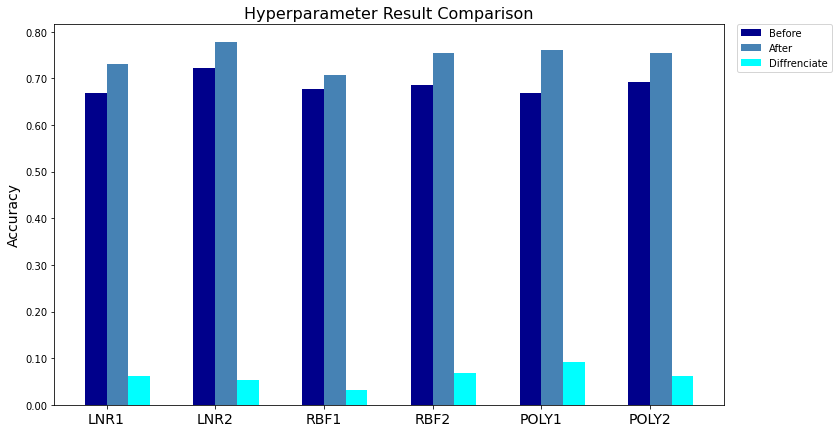

In [28]:
import numpy as np
from matplotlib.ticker import FormatStrFormatter

import matplotlib.pyplot as plt
%matplotlib inline


name = ['LNR1', 'LNR2', 'RBF1', 'RBF2', 'POLY1', 'POLY2']
before_HT = [cv_linear_first.mean(), cv_linear_second.mean(), cv_rbf_first.mean(), cv_rbf_second.mean(), 
             cv_poly_first.mean(), cv_poly_second.mean()]
after_HT = [cross_val_score_linear_first.mean(), cross_val_score_linear_second.mean(),
            cross_val_score_rbf_first.mean(), cross_val_score_rbf_second.mean(), 
            cross_val_score_poly_first.mean(), cross_val_score_poly_second.mean()]
diff_linear_first = ((cross_val_score_linear_first.mean()-cv_linear_first.mean()))
diff_linear_second = ((cross_val_score_linear_second.mean()-cv_linear_second.mean()))
diff_rbf_first = ((cross_val_score_rbf_first.mean()-cv_rbf_first.mean()))
diff_rbf_second = ((cross_val_score_rbf_second.mean()-cv_rbf_second.mean()))
diff_poly_first = ((cross_val_score_poly_first.mean()-cv_poly_first.mean()))
diff_poly_second = ((cross_val_score_poly_second.mean()-cv_poly_second.mean()))
diff_HT = [diff_linear_first, diff_linear_second,
           diff_rbf_first, diff_rbf_second,
           diff_poly_first, diff_poly_second]

x = np.arange(len(name))
width = 0.2

fig, ax = plt.subplots(figsize=(12, 7))

bfr = ax.bar(x - width/2, before_HT, width, label='Before', color='darkblue')
aftr = ax.bar(x + width/2, after_HT, width, label='After', color='steelblue')
diff = ax.bar(x + 0.3, diff_HT, width, label='Diffrenciate', color='cyan')
# diff_HT = ax.bar(x + width/2, diff_all, width, label='Diffrence', color='red')

ax.set_title('Hyperparameter Result Comparison', size=16)
ax.set_ylabel('Accuracy', size=14)
ax.set_xticks(x)
ax.set_xticklabels(name, size=14)
ax.legend(fontsize=14)
ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    
plt.savefig('analysis-fig/hyperparameter-tuning.png')
plt.show()

In [29]:
print("Before HyperParameter (Linear First): ", before_HT[0])
print("After HyperParameter: (Linear First)", after_HT[0])
print("Diff HyperParameter: (Linear First)", diff_HT[0])
print("============================")
print("Before HyperParameter (RBF First): ", before_HT[1])
print("After HyperParameter: (RBF First", after_HT[1])
print("Diff HyperParameter: (RBF First)", diff_HT[1])
print("============================")
print("Before HyperParameter (Poly First): ", before_HT[2])
print("After HyperParameter: (Poly First)", after_HT[2])
print("Diff HyperParameter: (Poly First)", diff_HT[2])

print("Before HyperParameter (Linear Second): ", before_HT[3])
print("After HyperParameter: (Linear Second)", after_HT[3])
print("Diff HyperParameter: (Linear Second)", diff_HT[3])
print("============================")
print("Before HyperParameter (RBF Second): ", before_HT[4])
print("After HyperParameter: (RBF Second)", after_HT[4])
print("Diff HyperParameter: (RBF Second)", diff_HT[4])
print("============================")
print("Before HyperParameter (Poly Second): ", before_HT[5])
print("After HyperParameter: (Poly Second)", after_HT[5])
print("Diff HyperParameter: (Poly Second)", diff_HT[5])

Before HyperParameter (Linear First):  0.6692307692307692
After HyperParameter: (Linear First) 0.7307692307692308
Diff HyperParameter: (Linear First) 0.06153846153846165
Before HyperParameter (RBF First):  0.7230769230769232
After HyperParameter: (RBF First 0.7769230769230769
Diff HyperParameter: (RBF First) 0.053846153846153766
Before HyperParameter (Poly First):  0.676923076923077
After HyperParameter: (Poly First) 0.7076923076923077
Diff HyperParameter: (Poly First) 0.03076923076923077
Before HyperParameter (Linear Second):  0.6846153846153846
After HyperParameter: (Linear Second) 0.7538461538461538
Diff HyperParameter: (Linear Second) 0.0692307692307692
Before HyperParameter (RBF Second):  0.6692307692307692
After HyperParameter: (RBF Second) 0.7615384615384616
Diff HyperParameter: (RBF Second) 0.09230769230769242
Before HyperParameter (Poly Second):  0.6923076923076923
After HyperParameter: (Poly Second) 0.7538461538461538
Diff HyperParameter: (Poly Second) 0.06153846153846154
